Imports

In [142]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from plotting import plot_array
from soundGen import play
from pointsFrequency import signal_to_hertz
from filterAudio import low_pass_Filter, high_pass_Filter, weierstrassFunc,\
     dirac_comb_discrete, whiteChorus
from coloredNoise import blue_noise, white_noise, brownian_noise, pink_noise, violet_noise
from numpy.random import uniform
from pointsNoise import cNoise


ImportError: cannot import name 'cNoise' from 'pointsNoise' (c:\Users\tov.tyvold\Projects\frequency_project\WebApp_Sine_Project\backend\pointsNoise.py)

Set universal variables above functions and declare them 

In [ ]:
Fs = 44100
T = 1/(Fs) 
N = Fs
amplitude = 2
frequency = [400, 200, 100]
t = 1
omega = 2 * np.pi


Then create code for signal

In [ ]:
t_vec = np.arange(N)*T*t 
ysum = 0
#sine_add = np.sin(np.linspace(-16 * np.pi,16 * np.pi,len(t_vec)))/10
#omega = 2 * np.pi* sine_add
for i in range(len(frequency)):
    ysum  += amplitude * np.sin(omega * frequency[i] * t_vec)


Normalize the signal


In [ ]:



normalized_y = ysum/ np.max(ysum)


White Chorus

In [ ]:
#lowpass_noise = white_noise(len(normalized_y),2)
lowpass_noise = cNoise(normalized_y, noise_intensity=  10,exponent = 1, fmin = 0.01)
lowpass_noise = lowpass_noise / np.max(np.abs(lowpass_noise))
width = 0.002
Fs = 44100
Delay = width 

# WIDTH can't be greater than DELAY.
DELAY = int(Delay * Fs)
WIDTH = int(width * Fs)

length = len(normalized_y)
MODFREQ = lowpass_noise / Fs
L = 1 + DELAY + WIDTH*2

BL = 0.7
FF = 1
FB = -0.7
x = np.zeros_like(normalized_y)
Delayline = np.zeros(L)
input = normalized_y.copy()
for n in range(length):
    DelaylineS = []
    # Time delay
    MOD = MODFREQ[n]
    TAP = 1 + DELAY + WIDTH * MOD 
    i = int(np.floor(TAP))
    frac = TAP - i 
    # Time index-delay -> K
    K = MOD + frac
    # System of equations
    # -------------------
    # Delay Line and
    # All-Pass Comb -> Chorus equation 
    DelaylineS_ = input[n] + FB * input[int(n-K)]
    DelaylineS.append(DelaylineS_)
    Delayline = list(DelaylineS) + list(Delayline[:L-1])
    x[n] =  BL * Delayline[i] + FF * (DelaylineS_) + input[n]


# Normalize:
g = BL + FF + FB
x = (x * g)/ np.max(np.abs(x))


NameError: name 'cNoise' is not defined

Plotting and PLaying sound  

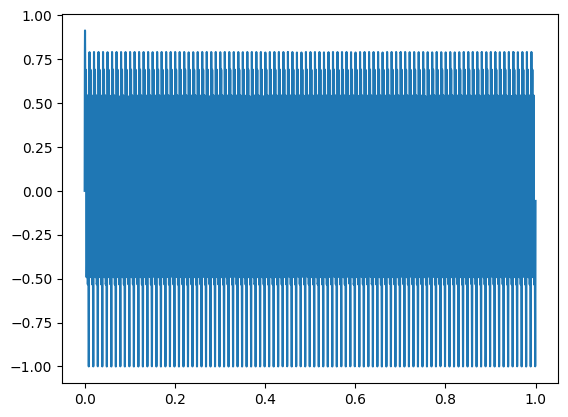

In [ ]:
plt.plot(t_vec, x)
plt.show()
play(normalized_y)
play(x)